In [8]:
#Rodando o programa
import matplotlib.pyplot as plt
import pandas as pd 
from  fpdf import FPDF

df = pd.read_csv('CADASTRO_IES_2020.CSV', encoding='ISO-8859-1', sep=';', low_memory=False)
df.head()

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,DOC_EX_60_MAIS,DOC_EX_BRANCA,DOC_EX_PRETA,DOC_EX_PARDA,DOC_EX_AMARELA,DOC_EX_INDÍGENA,DOC_EX_COR_ND,DOC_EX_BRA,DOC_EX_EST,DOC_EX_COM_DEFICIÊNCIA
0,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,2,18,1,8,0,0,27,54,0,0
1,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,3,45,5,17,2,0,0,67,2,0
2,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,9,114,2,31,2,0,3,152,0,0
3,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,1,30,1,4,0,0,4,39,0,0
4,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,0,14,0,7,0,0,18,39,0,0


In [2]:
print('Análise exploratória: ')
print('Total de linhas: ', len(df))
print('Resumo estatistíco: \n', df.describe())
print('\n')

Análise exploratória: 
Total de linhas:  2457
Resumo estatistíco: 
        NU_ANO_CENSO  CO_REGIAO_IES    CO_UF_IES  CO_MUNICIPIO_IES  \
count        2457.0    2457.000000  2457.000000      2.457000e+03   
mean         2020.0       2.994709    33.476190      3.365560e+06   
std             0.0       1.052941     9.622577      9.629679e+05   
min          2020.0       1.000000    11.000000      1.100023e+06   
25%          2020.0       2.000000    29.000000      2.909208e+06   
50%          2020.0       3.000000    33.000000      3.306305e+06   
75%          2020.0       4.000000    41.000000      4.106407e+06   
max          2020.0       5.000000    53.000000      5.300108e+06   

       IN_CAPITAL_IES  CO_MESORREGIAO_IES  CO_MICRORREGIAO_IES  \
count     2457.000000         2457.000000          2457.000000   
mean         0.348392            5.836793            23.398860   
std          0.476558            4.304170            18.938151   
min          0.000000            1.000000     

In [3]:
#Consulta alores NAN
for col in df:
  print(f'{col} quatidade de valores Nan: ', df[col].isna().sum())

NU_ANO_CENSO quatidade de valores Nan:  0
NO_REGIAO_IES quatidade de valores Nan:  0
CO_REGIAO_IES quatidade de valores Nan:  0
NO_UF_IES quatidade de valores Nan:  0
SG_UF_IES quatidade de valores Nan:  0
CO_UF_IES quatidade de valores Nan:  0
NO_MUNICIPIO_IES quatidade de valores Nan:  0
CO_MUNICIPIO_IES quatidade de valores Nan:  0
IN_CAPITAL_IES quatidade de valores Nan:  0
NO_MESORREGIAO_IES quatidade de valores Nan:  0
CO_MESORREGIAO_IES quatidade de valores Nan:  0
NO_MICRORREGIAO_IES quatidade de valores Nan:  0
CO_MICRORREGIAO_IES quatidade de valores Nan:  0
TP_ORGANIZACAO_ACADEMICA quatidade de valores Nan:  0
TP_CATEGORIA_ADMINISTRATIVA quatidade de valores Nan:  0
NO_MANTENEDORA quatidade de valores Nan:  0
CO_MANTENEDORA quatidade de valores Nan:  0
NO_IES quatidade de valores Nan:  0
SG_IES quatidade de valores Nan:  411
CO_IES quatidade de valores Nan:  0
DS_ENDERECO_IES quatidade de valores Nan:  0
DS_NUMERO_ENDERECO_IES quatidade de valores Nan:  1
DS_COMPLEMENTO_ENDE

In [4]:
#Removendo valores nan
df.dropna(inplace=True)

In [5]:
#fazendo o cálculo
qt_regiao = df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()


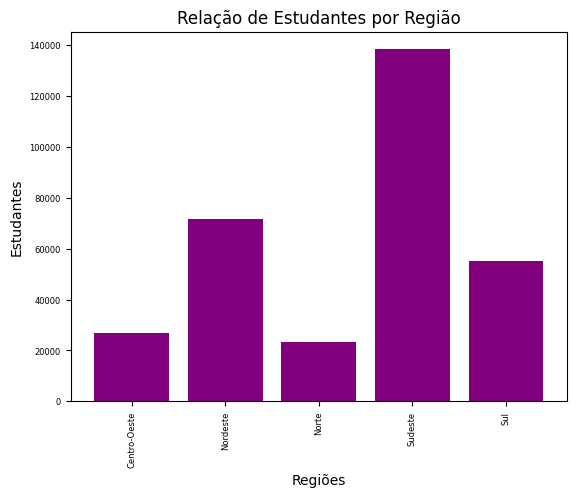

In [6]:
#gráfico
qt_regiao.plot(kind='bar', color='purple', title='Relação de Estudantes por Região', fontsize=6.0, width=0.8)
plt.xlabel('Regiões')
plt.ylabel('Estudantes')
plt.show()
plt.savefig('Rel-est-reg.png')



In [10]:
pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()
pdf.set_font('Times','', 16)
text='Estudantes por Região'
pdf.multi_cell(200, 10, ln=True, align='C', txt= text)

pdf.image('Rel-est-reg.png', x=10, y=40, w=150)

pdf.set_font('Times','',12)
pdf.set_y(150)
texto = 'Relação de estudantes por região'
pdf.multi_cell(200, 10, ln=True, align='J', txt= texto)
pdf.output('estudantes-regiao.pdf')
print('Salvamento concluído!')

C:\Users\milen\AppData\Local\Temp\ipykernel_13916\2683565350.py:5: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.multi_cell(200, 10, ln=True, align='C', txt= text)
C:\Users\milen\AppData\Local\Temp\ipykernel_13916\2683565350.py:12: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.multi_cell(200, 10, ln=True, align='J', txt= texto)


Salvamento concluído!
